# K-Means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# creating distributions
mean_01 = np.array([0.0, 0.0])
cov_01 = np.array([[1, 0.3], [0.3, 1]])
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 250)

mean_02 = np.array([5.0, 6.0])
cov_02 = np.array([[1.5, 0.3], [0.3, 1]])
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 250)

mean_03 = np.array([5.0, -1.0])
cov_03 = np.array([[1.2, 0.5], [0.5, 1,3]])
dist_03 = np.random.multivariate_normal(mean_03, cov_01, 250)

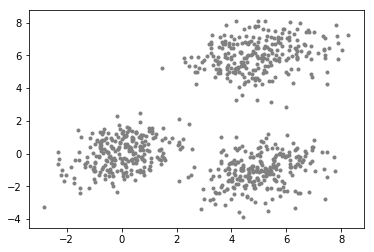

In [3]:
# visualising distributions
plt.scatter(dist_01[:, 0], dist_01[:, 1], color = 'grey', marker = '.')
plt.scatter(dist_02[:, 0], dist_02[:, 1], color = 'grey', marker = '.')
plt.scatter(dist_03[:, 0], dist_03[:, 1], color = 'grey', marker = '.')
plt.show()

In [4]:
#creating data
data = np.vstack((dist_01, dist_02, dist_03))
np.random.shuffle(data)

In [5]:
# distance function
def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

In [6]:
# k-means clustering
k = 3
clusters = {}
colors = ['blue', 'orange', 'green', 'red']
max_itr = 5
for i in range(k):
    cluster_vals = {
        'centroid': np.random.uniform(low = data.min(), high = data.max(), size = data.shape[1]),
        'points': [],
        'color': colors[i],
        'hist': []
    }
    clusters[i] = cluster_vals

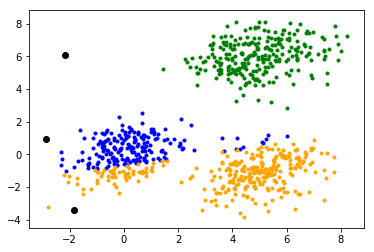

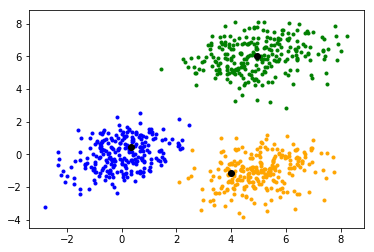

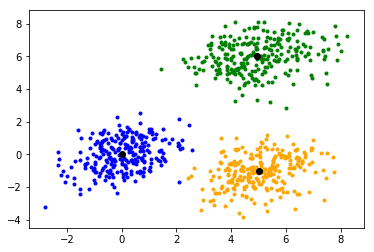

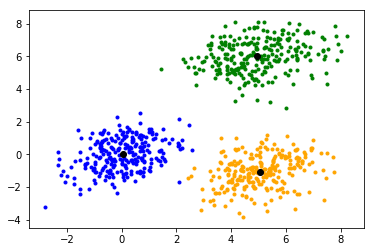

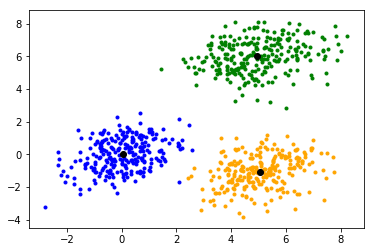

In [7]:
for itr in range(max_itr):
    plt.figure()
    for i in range(data.shape[0]):
        dist = []
        for c_id in range(k):
            d = distance(data[i, :], clusters[c_id]['centroid'])
            dist.append(d)
        dist = np.array(dist)
        cluster_id = dist.argmin()
        clusters[cluster_id]['points'].append(data[i, :])
    for c_id in range(k):
        cluster = clusters[c_id]
        for p in cluster['points']:
            plt.scatter(p[0], p[1], color = cluster['color'], marker = '.')
        plt.scatter(cluster['centroid'][0], cluster['centroid'][1], color = 'black')
    plt.show()
    for c_id in range(k):
        cluster = clusters[c_id]
        cluster['hist'].append(cluster['centroid'])
        if len(cluster['points']) > 0:
            cluster['centroid'] = np.mean(np.array(cluster['points']), axis = 0)
        if itr < (max_itr - 1):
            cluster['points'] = []